In [1]:
import nltk

In [3]:
#nltk.download_shell()

In [7]:
msgs=[line.rstrip() for line in open('ML_Files/SMSspamCollection')]

In [8]:
print(len(msgs))

5574


In [10]:
msgs[10]

"ham\tI'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [12]:
for mess_no,messages in enumerate(msgs[:20]):
    print(mess_no,messages)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [13]:
msgs[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [14]:
import pandas as pd

In [16]:
messages = pd.read_csv('ML_Files/SMSSpamCollection',sep='\t',names=['label','message'])

In [17]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [19]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [20]:
messages['length']=messages['message'].apply(len)

In [21]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

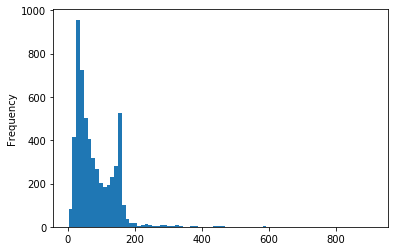

In [32]:
messages['length'].plot.hist(bins=80)

In [35]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000013085899A08>,
      dtype=object)

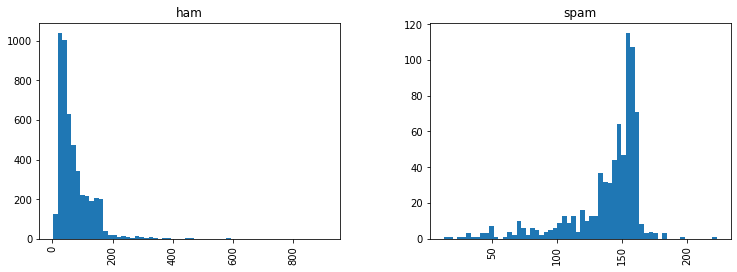

In [37]:
messages.hist(column='length',by='label',bins=60,figsize=(12,4))

In [38]:
#We ca see that length of spam messages are usually longer in length than ham messages

In [39]:
import string

In [73]:
mess='sample message! Nootice:it has punctu=ation.'

In [74]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [75]:
nopunc=[c for c in mess if c not in string.punctuation]

In [76]:
nopunc

['s',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 'o',
 't',
 'i',
 'c',
 'e',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [77]:
from nltk.corpus import stopwords

In [78]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [79]:
stopwords.words('russian')

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [80]:
nopunc= ''.join(nopunc)

In [82]:
nopunc.split()

['sample', 'message', 'Nooticeit', 'has', 'punctuation']

In [84]:
clean_mess=[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [85]:
clean_mess

['sample', 'message', 'Nooticeit', 'punctuation']

In [87]:
def text_process(mess):
    #remove punc
    #Join message
    #remove stopwords and return
    nopunc=[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [88]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [89]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [90]:
#study stemming in nltk

In [92]:
""""
1. Count freq. of a word in each msg
2.Weigh the counts, so that frequent tokens get lower weight (IDF)
3.Normalise the vetors to unit length and abstract the original text length(L2 Norm)
""""

SyntaxError: EOL while scanning string literal (<ipython-input-92-83a968744a70>, line 5)

In [93]:
from sklearn.feature_extraction.text import CountVectorizer

In [95]:
bow_transformer= CountVectorizer(analyzer=text_process).fit(messages['message'])#1)Creating Instance of bag of words transformer

In [96]:
print(len(bow_transformer.vocabulary_))

11425


In [106]:
mess4=messages['message'][70]

In [107]:
print(mess4)

Wah lucky man... Then can save money... Hee...


In [108]:
bow4=bow_transformer.transform([mess4])

In [109]:
print(bow4)

  (0, 2203)	1
  (0, 4254)	1
  (0, 7944)	1
  (0, 8009)	1
  (0, 8241)	1
  (0, 9549)	1


In [110]:
print(bow4.shape)

(1, 11425)


In [114]:
bow_transformer.get_feature_names()[7944]

'lucky'

In [115]:
messages_bow=bow_transformer.transform(messages['message'])

In [116]:
print('Shape:',messages_bow.shape)

Shape: (5572, 11425)


In [117]:
messages_bow.nnz #NON ZERO OCCURENCES

50548

In [118]:
sparsity=(100.0*messages_bow.nnz/(messages_bow.shape[0]*messages_bow.shape[1]))

In [119]:
print(sparsity)  #NON ZERO MSGS/TOTAL NO. OF MSGS(rows*columns)

0.07940295412668218


In [120]:
from sklearn.feature_extraction.text import TfidfTransformer

In [121]:
tfidf_transformer=TfidfTransformer().fit(messages_bow)#2)CREATING AN INSTANCE OF TFIDF TRANSFORMER

In [123]:
tfidf4=tfidf_transformer.transform(bow4)

In [124]:
print(tfidf4)

  (0, 9549)	0.4427034432000026
  (0, 8241)	0.33177599238531963
  (0, 8009)	0.35957073024218494
  (0, 7944)	0.40987337175978633
  (0, 4254)	0.47027638352433626
  (0, 2203)	0.41891667957988443


In [134]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['okay']]#Inverse document freq of a word

6.917638586467326

In [136]:
messages_tfidf=tfidf_transformer.transform(messages_bow)

In [137]:
from sklearn.naive_bayes import MultinomialNB

In [138]:
spam_detect_model=MultinomialNB().fit(messages_tfidf,messages['label'])#3)Creating instance of classifier

In [139]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [140]:
messages['label'][70]

'ham'

In [141]:
all_pred=spam_detect_model.predict(messages_tfidf)

In [142]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [148]:
from sklearn.model_selection import train_test_split

In [150]:
msg_train,msg_test,label_train,label_test=train_test_split(messages['message'],messages['label'],test_size=0.3)

In [151]:
msg_train

4173                               Sorry, I'll call later
5381           You have 1 new message. Call 0207-083-6089
2077            Trust me. Even if isn't there, its there.
3251                             Babe, I need your advice
4285    Yes. I come to nyc for audiitions and am tryin...
                              ...                        
1803                         Ok lor thanx... Ü in school?
5350        No one interested. May be some business plan.
1137    Dont forget you can place as many FREE Request...
40      Pls go ahead with watts. I just wanted to be s...
2019                               Ya it came a while ago
Name: message, Length: 3900, dtype: object

In [152]:
#Data Pipeline feature of sklearn

In [164]:
from sklearn.pipeline import Pipeline

In [159]:
pipeline=Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('Classifier',MultinomialNB())
])

In [160]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000013086C4E828>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('Classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [161]:
predictions=pipeline.predict(msg_test)

In [162]:
from sklearn.metrics import classification_report

In [163]:
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1436
        spam       1.00      0.71      0.83       236

    accuracy                           0.96      1672
   macro avg       0.98      0.86      0.90      1672
weighted avg       0.96      0.96      0.96      1672



In [165]:
from sklearn.ensemble import RandomForestClassifier
pipeline=Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('Classifier',RandomForestClassifier())
])

pipeline.fit(msg_train,label_train)

predictions=pipeline.predict(msg_test)

from sklearn.metrics import classification_report

print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1436
        spam       1.00      0.81      0.89       236

    accuracy                           0.97      1672
   macro avg       0.98      0.90      0.94      1672
weighted avg       0.97      0.97      0.97      1672

